# D is for Decision Tree
> What is classification and why is it used?

- toc: false 
- badges: True
- comments: true
- categories: [algorithm]
- sticky_rank: 4
- hide: true

## _What is a **Decision Tree**?_
**Decision Trees** are a type of algorithm used for either classification or regression tasks.  

## *How do they work?*  
While the math is [fairly complicated](https://heartbeat.fritz.ai/understanding-the-mathematics-behind-decision-trees-22d86d55906), the concept is incredibly straightforward:  
1. start with all observations in one group
2. identify a binary question, i.e., ("*yes/no*", "*over/under*") which results in two groups which are as distinct from eachother as possible
3. repeat step two until every subgroup homogeneous or some other metric has been achieved

## What are the advantages?  
**Transparency**: They are considered a [*white/glass box*](https://en.wikipedia.org/wiki/Decision_tree_learning) algorithm because you can see what decisions the algorithm made which leads to,   

**Interpretability**: Again, since you can see which decisions were made, it's easy to comprehend and explain the predictions. 

**Ease**: Data trees **DO NOT** require feature scaling or normalization{% fn 1 %}.  

## What are the disadvantages?  
**Overfitting**: Since they try to find the purest groups, they have a tendacy to overfit.  

**Non-Linear Data**: Relationships in the data between features are not considered. 

## How do we train a decision tree? 

### Step 0: Frame the Problem
*Can we determine weather or not a patron was a smoker?*   

I know that's a pretty random question, but while perusing the [Seaborn](https://github.com/mwaskom/seaborn-data) data page, I saw the `tips` dataset and couldn't help myself. 

### Step 1: Collect/Load our Data

In [6]:
import seaborn as sns
sns.set(palette="colorblind")
tips = sns.load_dataset("tips")

### Step 2: Inspect our Data
Namely, do we have any missing values? 

In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


Good news! No missing values but, we're going to need to relabel those categorical variables for our decision tree. 

### Step 2 (Cont.): Visualize the Data

Let's inspect the target.  

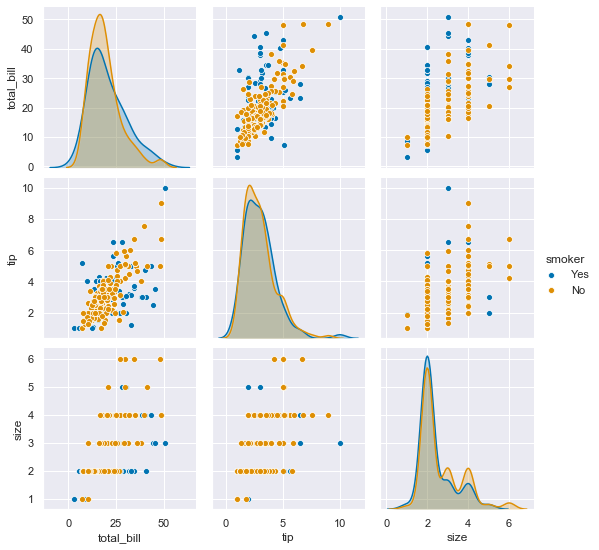

In [8]:
sns.pairplot(data=tips, hue="smoker");

Hmmm. Not much to see in terms of a relationship between smoking and the continuous variables.  

Let's look at the categorical variables.  

### Questions: 
What is the distribution of: 
- sex
- smokers

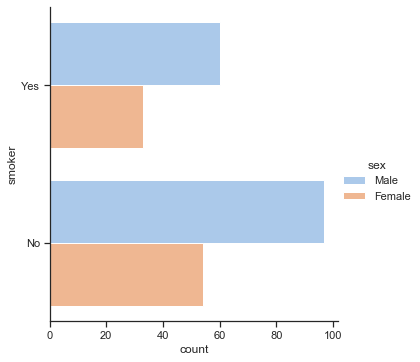

In [18]:
sns.catplot(y="smoker", 
            hue="sex", 
            kind="count",
            data=tips);

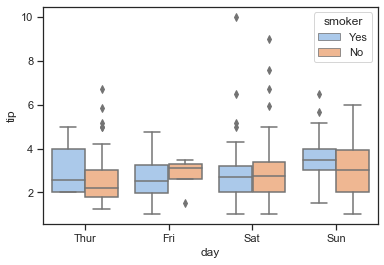

In [14]:
import seaborn as sns

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", 
            y="tip",
            hue="smoker",
            data=tips);

Now we're cookin! While there's some overlap between *veriscolor* and *virginica*, it's clear petal length and width are far better features for predictiong the type of flower than sepal length and width.  Therefore, let's

### Step 3: Prepare the data

Create a test train split. 

In [34]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(tips, test_size=0.2, random_state=42)

In [20]:
X = train_set.drop('Loan_Status', axis=1)
y = train['Loan_Status']

/home/evan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/evan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [33]:
train_set.head()

,total_bill,tip,sex,smoker,day,time,size,male
228,13.28,2.72,Male,No,Sat,Dinner,2,1
208,24.27,2.03,Male,Yes,Sat,Dinner,2,1
96,27.28,4.00,Male,Yes,Fri,Dinner,2,1
167,31.71,4.50,Male,No,Sun,Dinner,4,1
84,15.98,2.03,Male,No,Thur,Lunch,2,1


and then

### Step 4: Fit the model 

In [8]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_new, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Visualzing the model

Earlier, I said it was easy to explain the decision the model made. 

"How?" you ask? By visualizing it: 

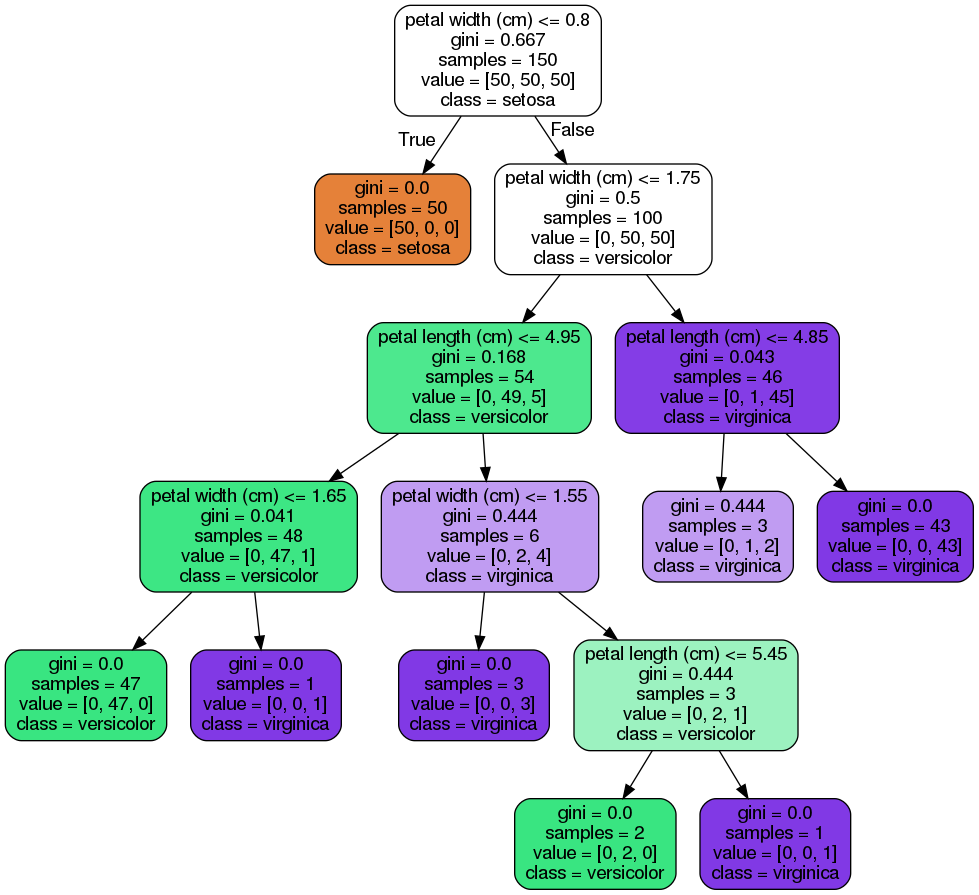

In [10]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf,
                            out_file=None,
                            feature_names=iris.feature_names[2:],
                            class_names=iris.target_names,
                            rounded=True,
                            filled=True)

from IPython.display import Image  
import pydotplus

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Further Reading
[Understanding the Mathematics Behind Decision Trees](https://heartbeat.fritz.ai/understanding-the-mathematics-behind-decision-trees-22d86d55906)  
[Chapter 6: Decision Trees in *Hands-On Machine Learning with Scikit-Learn and TensorFlow*](https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/)  
[Visualizing Decision Trees](https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/)


### References/Footnotes
{{ 'Geron, 2019, Page 177' | fndetail: 1 }}  